In [1]:
import os
import getpass

os.environ["AZURE_OPENAI_API_KEY"] = getpass.getpass()
os.environ["AZURE_OPENAI_ENDPOINT"] = getpass.getpass()

 ········
 ········


# Audio Test Files

### 1. Short Speech (0:18)
The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.

In [2]:
file1 = "harvard.wav"

### 2. Short Speech with Noisy Background (0:03)
The stale smell of old beer lingers.

In [3]:
file2 = "jackhammer.wav"

### 3. Long Speech with Background Music (4:19)
Truth be told, I never graduated from college. It was pretty scary at the time, but looking back, it was one of the best decisions I ever made. The minute I dropped out, I could stop taking the required classes that didn't interest me and begin dropping in on the ones that looked far more interesting. It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms. I returned Coke bottles for the five cent deposits to buy food with, and I would walk the seven miles across town every Sunday night. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. You've got to find what you love, and that is as true for work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking and don't settle. As with all matters of the heart, you'll know when you find it and, like any great relationship, it just gets better and better as the years roll on. So keep looking. Don't settle. When I was 17, I read a quote, "If you live each day as if it was your last, someday you'll most certainly be right." It made an impression on me, and since then, for the past 33 years, I've looked in the mirror every morning and asked myself, if today were the last day of my life, would I want to do what I am about to do today? And whenever the answer has been no for too many days in a row, I know I need to change something. Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life. Because almost everything, all external expectations, all pride, all fear of embarrassment or failure, these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart. About a year ago, I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn't even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor's code for prepare to die. It means to try and tell your kids everything you thought you'd have the next ten years to tell them, in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes. No one wants to die. Even people who want to go to heaven don't want to die to get there. And yet, death is the destination we all share. No one has ever escaped it, and that is as it should be, because death is very likely the single best invention of life. It's life's change agent. It clears out the old to make way for the new. Right now, the new is you. Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma, which is living with the results of other people's thinking. Don't let the noise of others' opinions drown out your own inner voice, and most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary. It was their farewell message as they signed off. Stay hungry, stay foolish. And I've always wished that for myself. And now, as you graduate to begin anew, I wish that for you. Stay hungry, stay foolish.

In [4]:
file3 = "Steve_Jobs_Speech.mp3"

# Time to Transcribe

In [5]:
from openai import AzureOpenAI

client = AzureOpenAI(api_version="2025-01-01-preview")

## Short Speech (0:18)

In [6]:
with open(file1, "rb") as f:
    audio_bytes = f.read()

In [7]:
%%timeit -n 10 -r 2

client.audio.transcriptions.create(
    model="gpt-4o-mini-transcribe",
    file=("audio.wav", audio_bytes, "audio/wav")
)

1.97 s ± 227 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


## Long Speech (4:19)

In [8]:
with open(file3, "rb") as f:
    audio_bytes = f.read()

In [9]:
%%timeit -n 10 -r 2

client.audio.transcriptions.create(
    model="gpt-4o-mini-transcribe",
    file=("audio.mp3", audio_bytes, "audio/mpeg")
)

6.82 s ± 520 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


# Accuracy of Transcription (using Word Error Rate)
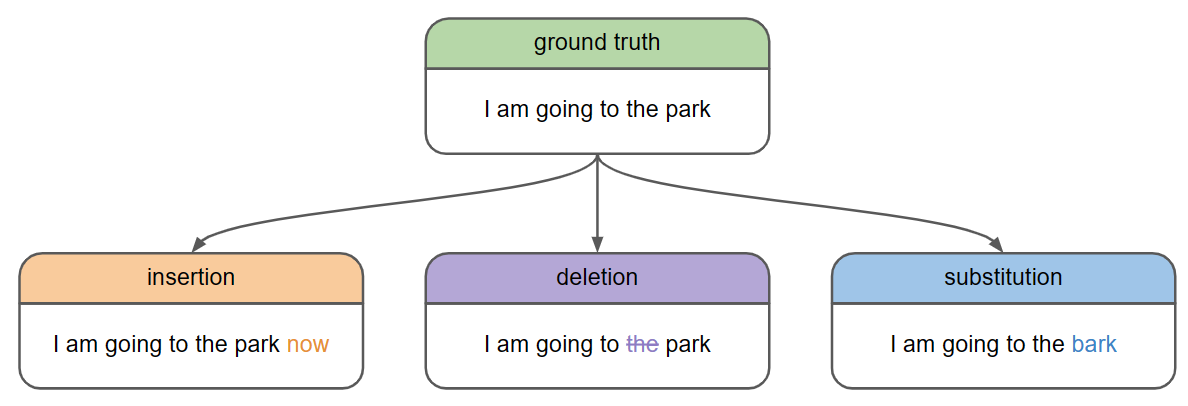
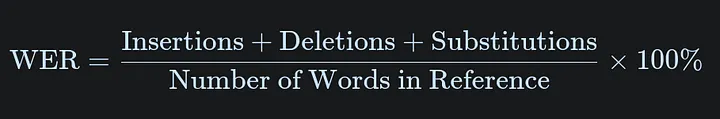
* lower value = better accuracy

In [10]:
import jiwer
import re

ref1 = """The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun."""
ref2 = """The stale smell of old beer lingers."""
ref3 = """Truth be told, I never graduated from college. It was pretty scary at the time, but looking back, it was one of the best decisions I ever made. The minute I dropped out, I could stop taking the required classes that didn't interest me and begin dropping in on the ones that looked far more interesting. It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms. I returned Coke bottles for the five cent deposits to buy food with, and I would walk the seven miles across town every Sunday night. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. You've got to find what you love, and that is as true for work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking and don't settle. As with all matters of the heart, you'll know when you find it and, like any great relationship, it just gets better and better as the years roll on. So keep looking. Don't settle. When I was 17, I read a quote, "If you live each day as if it was your last, someday you'll most certainly be right." It made an impression on me, and since then, for the past 33 years, I've looked in the mirror every morning and asked myself, if today were the last day of my life, would I want to do what I am about to do today? And whenever the answer has been no for too many days in a row, I know I need to change something. Remembering that I'll be dead soon is the most important tool I've ever encountered to help me make the big choices in life. Because almost everything, all external expectations, all pride, all fear of embarrassment or failure, these things just fall away in the face of death, leaving only what is truly important. Remembering that you are going to die is the best way I know to avoid the trap of thinking you have something to lose. You are already naked. There is no reason not to follow your heart. About a year ago, I was diagnosed with cancer. I had a scan at 7:30 in the morning, and it clearly showed a tumor on my pancreas. I didn't even know what a pancreas was. The doctors told me this was almost certainly a type of cancer that is incurable, and that I should expect to live no longer than three to six months. My doctor advised me to go home and get my affairs in order, which is doctor's code for prepare to die. It means to try and tell your kids everything you thought you'd have the next ten years to tell them, in just a few months. It means to make sure everything is buttoned up so that it will be as easy as possible for your family. It means to say your goodbyes. No one wants to die. Even people who want to go to heaven don't want to die to get there. And yet, death is the destination we all share. No one has ever escaped it, and that is as it should be, because death is very likely the single best invention of life. It's life's change agent. It clears out the old to make way for the new. Right now, the new is you. Your time is limited, so don't waste it living someone else's life. Don't be trapped by dogma, which is living with the results of other people's thinking. Don't let the noise of others' opinions drown out your own inner voice, and most important, have the courage to follow your heart and intuition. They somehow already know what you truly want to become. Everything else is secondary. It was their farewell message as they signed off. Stay hungry, stay foolish. And I've always wished that for myself. And now, as you graduate to begin anew, I wish that for you. Stay hungry, stay foolish."""

In [11]:
def transcribe_with_acc(audio, ref):
    with open(audio, "rb") as f:
        audio_bytes = f.read()

    audio_format = os.path.splitext(audio)[-1]
    model = "gpt-4o-mini-transcribe"

    if audio_format == ".wav":
        resp = client.audio.transcriptions.create(
            model=model,
            file=("audio.wav", audio_bytes, "audio/wav")
        )
    elif audio_format == ".mp3":
        resp = client.audio.transcriptions.create(
            model=model,
            file=("audio.mp3", audio_bytes, "audio/mpeg")
        )
    else:
        return "Invalid Format"

    
    result = resp.text

    transformation = jiwer.Compose([
        jiwer.ToLowerCase(),
        jiwer.RemovePunctuation(),
        jiwer.RemoveMultipleSpaces(),
        jiwer.Strip(),
        jiwer.ReduceToListOfListOfWords()
    ])

    # Calculate WER (percentage, 2dp) 
    wer = round(jiwer.wer(ref, result, transformation, transformation) * 100, 2)

    print(f"WER: {wer}")
    print('\n')
    print(f"Result:\n")
    return result

In [12]:
transcribe_with_acc(file1, ref1)

WER: 0.0


Result:



'The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.'

In [13]:
transcribe_with_acc(file2, ref2)

WER: 0.0


Result:



'The stale smell of old beer lingers.'

In [14]:
transcribe_with_acc(file3, ref3)

WER: 0.69


Result:



"Truth be told, I never graduated from college. It was pretty scary at the time, but looking back, it was one of the best decisions I ever made. The minute I dropped out, I could stop taking the required classes that didn't interest me and begin dropping in on the ones that looked far more interesting. It wasn't all romantic. I didn't have a dorm room, so I slept on the floor in friends' rooms. I returned Coke bottles for the five-cent deposits to buy food with. And I would walk the seven miles across town every Sunday night. And much of what I stumbled into by following my curiosity and intuition turned out to be priceless later on. You've got to find what you love, and that is as true for work as it is for your lovers. Your work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking, and don't settle. As with all matt

## Check Differences

In [15]:
import Levenshtein

hyp = transcribe_with_acc(file3, ref3)

ref_words = ref3.split()
hyp_words = hyp.split()

# Get edit operations
edit_ops = Levenshtein.editops(ref_words, hyp_words)

# Analyze edit operations to identify contributing words
for op, ref_idx, hyp_idx in edit_ops:
    if op == 'replace':
        print(f"Substitution: '{ref_words[ref_idx]}' (reference) replaced by '{hyp_words[hyp_idx]}' (hypothesis)")
    elif op == 'insert':
        print(f"Insertion: '{hyp_words[hyp_idx]}' (hypothesis) inserted")
    elif op == 'delete':
        print(f"Deletion: '{ref_words[ref_idx]}' (reference) deleted")

WER: 0.69


Result:

Substitution: 'with,' (reference) replaced by 'with.' (hypothesis)
Substitution: 'and' (reference) replaced by 'And' (hypothesis)
Substitution: 'looking' (reference) replaced by 'looking,' (hypothesis)
Substitution: 'it' (reference) replaced by 'it.' (hypothesis)
Substitution: 'and,' (reference) replaced by 'And' (hypothesis)
Substitution: 'looking.' (reference) replaced by 'looking,' (hypothesis)
Substitution: 'Don't' (reference) replaced by 'don't' (hypothesis)
Substitution: '"If' (reference) replaced by 'If' (hypothesis)
Substitution: 'right."' (reference) replaced by 'right.' (hypothesis)
Substitution: 'if' (reference) replaced by 'If' (hypothesis)
Substitution: '7:30' (reference) replaced by '7.30' (hypothesis)
Substitution: 'everything' (reference) replaced by 'everything.' (hypothesis)
Substitution: 'you' (reference) replaced by 'You' (hypothesis)
Substitution: 'ten' (reference) replaced by '10' (hypothesis)
Substitution: 'your' (reference) replaced by 'you'